In [12]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import spacy

from matplotlib.pyplot import imread
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

In [13]:
# Import extracted amazon reviews Dataset (How to Extract amazon reviews - Refer Extract Amazon Reviews using Scrapy.ipynb)
reviews=pd.read_csv('comments.csv')
reviews

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,comment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
304,305,B001UJEN6C,AUXHG88OYWCGM,Nicholas Wagner,0,0,5,1333411200,"Flavor getting better, energy is great",I've been buying and drinking this for over a ...
305,306,B001UJEN6C,ATN552TF5V40Z,Lh,1,5,1,1326758400,So awful I can barely describe,This is the first time I've really been misled...
306,307,B003EMU7EU,A3DSWITPB6NBT5,benvenutofam,0,0,4,1287619200,could use only once,I loved this mold! I wished I could have used...
307,308,B0064KOUNI,A215QEI3FPLVXU,"Carol L. Chmiel ""Carol Chmiel""",0,0,5,1349136000,VANILLA TOOTSIE ROLLS,You HAVE to try the VANILLA Tootsie Rolls! Th...


# EDA

In [14]:
reviews.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,comment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [15]:
reviews.tail()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,comment
304,305,B001UJEN6C,AUXHG88OYWCGM,Nicholas Wagner,0,0,5,1333411200,"Flavor getting better, energy is great",I've been buying and drinking this for over a ...
305,306,B001UJEN6C,ATN552TF5V40Z,Lh,1,5,1,1326758400,So awful I can barely describe,This is the first time I've really been misled...
306,307,B003EMU7EU,A3DSWITPB6NBT5,benvenutofam,0,0,4,1287619200,could use only once,I loved this mold! I wished I could have used...
307,308,B0064KOUNI,A215QEI3FPLVXU,"Carol L. Chmiel ""Carol Chmiel""",0,0,5,1349136000,VANILLA TOOTSIE ROLLS,You HAVE to try the VANILLA Tootsie Rolls! Th...
308,309,B003YDP5PA,AAZ084UMH8VZ2,"D. L. Brown ""A Knower Of Good Things""",3,3,5,1299196800,One of my Favoritte foods,Try this you might like it. I did and I am qui...


In [16]:
reviews.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
comment                   0
dtype: int64

In [17]:
reviews.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'comment'],
      dtype='object')

In [18]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      309 non-null    int64 
 1   ProductId               309 non-null    object
 2   UserId                  309 non-null    object
 3   ProfileName             309 non-null    object
 4   HelpfulnessNumerator    309 non-null    int64 
 5   HelpfulnessDenominator  309 non-null    int64 
 6   Score                   309 non-null    int64 
 7   Time                    309 non-null    int64 
 8   Summary                 309 non-null    object
 9   comment                 309 non-null    object
dtypes: int64(5), object(5)
memory usage: 24.3+ KB


In [19]:
reviews.corr()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
Id,1.000000,-0.005086,0.040680,-0.032779,0.135104
HelpfulnessNumerator,-0.005086,1.000000,0.922516,0.036989,-0.325471
HelpfulnessDenominator,0.040680,0.922516,1.000000,-0.123023,-0.386784
Score,-0.032779,0.036989,-0.123023,1.000000,0.031456
Time,0.135104,-0.325471,-0.386784,0.031456,1.000000


In [20]:
reviews.dtypes

Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
comment                   object
dtype: object

array([[<AxesSubplot:title={'center':'Id'}>,
        <AxesSubplot:title={'center':'HelpfulnessNumerator'}>],
       [<AxesSubplot:title={'center':'HelpfulnessDenominator'}>,
        <AxesSubplot:title={'center':'Score'}>],
       [<AxesSubplot:title={'center':'Time'}>, <AxesSubplot:>]],
      dtype=object)

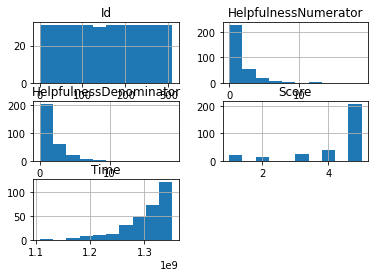

In [21]:
reviews.hist()

In [22]:
#TEXT PREPROCESSING

In [23]:
reviews=[comment.strip() for comment in reviews.comment] # remove both the leading and the trailing characters
reviews=[comment for comment in reviews if comment] # removes empty strings, because they are considered in Python as False
reviews[0:10]

['I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.',
 'Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".',
 'This is a confection that has been around a few centuries.  It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar.  And it is a tiny mouthful of heaven.  Not too chewy, and very flavorful.  I highly recommend this yummy treat.  If you are familiar with the story of C.S. Lewis\' "The Lion, The Witch, and The Wardrobe" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch.',
 'If you are looking f

In [24]:
# Joining the list into one string/text
reviews_text=' '.join(reviews)
reviews_text

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most. Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo". This is a confection that has been around a few centuries.  It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar.  And it is a tiny mouthful of heaven.  Not too chewy, and very flavorful.  I highly recommend this yummy treat.  If you are familiar with the story of C.S. Lewis\' "The Lion, The Witch, and The Wardrobe" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch. If you are looking for the secret

In [25]:
# Remove Punctuations 
no_punc_text=reviews_text.translate(str.maketrans('','',string.punctuation))
no_punc_text

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality The product looks more like a stew than a processed meat and it smells better My Labrador is finicky and she appreciates this product better than  most Product arrived labeled as Jumbo Salted Peanutsthe peanuts were actually small sized unsalted Not sure if this was an error or if the vendor intended to represent the product as Jumbo This is a confection that has been around a few centuries  It is a light pillowy citrus gelatin with nuts  in this case Filberts And it is cut into tiny squares and then liberally coated with powdered sugar  And it is a tiny mouthful of heaven  Not too chewy and very flavorful  I highly recommend this yummy treat  If you are familiar with the story of CS Lewis The Lion The Witch and The Wardrobe  this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch If you are looking for the secret ingredient in Robitussin I b

In [26]:
# Tokenization
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Shirisha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shirisha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [27]:
from nltk import word_tokenize
text_tokens=word_tokenize(no_punc_text)
print(text_tokens[0:50])

['I', 'have', 'bought', 'several', 'of', 'the', 'Vitality', 'canned', 'dog', 'food', 'products', 'and', 'have', 'found', 'them', 'all', 'to', 'be', 'of', 'good', 'quality', 'The', 'product', 'looks', 'more', 'like', 'a', 'stew', 'than', 'a', 'processed', 'meat', 'and', 'it', 'smells', 'better', 'My', 'Labrador', 'is', 'finicky', 'and', 'she', 'appreciates', 'this', 'product', 'better', 'than', 'most', 'Product', 'arrived']


In [28]:
len(text_tokens)

21950

In [29]:
# Remove stopwords
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')

sw_list=['I','The','It','A']
my_stop_words.extend(sw_list)

no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)

['bought', 'several', 'Vitality', 'canned', 'dog', 'food', 'products', 'found', 'good', 'quality', 'product', 'looks', 'like', 'stew', 'processed', 'meat', 'smells', 'better', 'My', 'Labrador', 'finicky', 'appreciates', 'product', 'better', 'Product', 'arrived', 'labeled', 'Jumbo', 'Salted', 'Peanutsthe', 'peanuts', 'actually', 'small', 'sized', 'unsalted', 'Not', 'sure', 'error', 'vendor', 'intended', 'represent', 'product', 'Jumbo', 'This', 'confection', 'around', 'centuries', 'light', 'pillowy', 'citrus', 'gelatin', 'nuts', 'case', 'Filberts', 'And', 'cut', 'tiny', 'squares', 'liberally', 'coated', 'powdered', 'sugar', 'And', 'tiny', 'mouthful', 'heaven', 'Not', 'chewy', 'flavorful', 'highly', 'recommend', 'yummy', 'treat', 'If', 'familiar', 'story', 'CS', 'Lewis', 'Lion', 'Witch', 'Wardrobe', 'treat', 'seduces', 'Edmund', 'selling', 'Brother', 'Sisters', 'Witch', 'If', 'looking', 'secret', 'ingredient', 'Robitussin', 'believe', 'found', 'got', 'addition', 'Root', 'Beer', 'Extract',

In [30]:
# Normalize the data
lower_words=[comment.lower() for comment in no_stop_tokens]
print(lower_words)

['bought', 'several', 'vitality', 'canned', 'dog', 'food', 'products', 'found', 'good', 'quality', 'product', 'looks', 'like', 'stew', 'processed', 'meat', 'smells', 'better', 'my', 'labrador', 'finicky', 'appreciates', 'product', 'better', 'product', 'arrived', 'labeled', 'jumbo', 'salted', 'peanutsthe', 'peanuts', 'actually', 'small', 'sized', 'unsalted', 'not', 'sure', 'error', 'vendor', 'intended', 'represent', 'product', 'jumbo', 'this', 'confection', 'around', 'centuries', 'light', 'pillowy', 'citrus', 'gelatin', 'nuts', 'case', 'filberts', 'and', 'cut', 'tiny', 'squares', 'liberally', 'coated', 'powdered', 'sugar', 'and', 'tiny', 'mouthful', 'heaven', 'not', 'chewy', 'flavorful', 'highly', 'recommend', 'yummy', 'treat', 'if', 'familiar', 'story', 'cs', 'lewis', 'lion', 'witch', 'wardrobe', 'treat', 'seduces', 'edmund', 'selling', 'brother', 'sisters', 'witch', 'if', 'looking', 'secret', 'ingredient', 'robitussin', 'believe', 'found', 'got', 'addition', 'root', 'beer', 'extract',

In [31]:
# Stemming (Optional)
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens)

['bought', 'sever', 'vital', 'can', 'dog', 'food', 'product', 'found', 'good', 'qualiti', 'product', 'look', 'like', 'stew', 'process', 'meat', 'smell', 'better', 'my', 'labrador', 'finicki', 'appreci', 'product', 'better', 'product', 'arriv', 'label', 'jumbo', 'salt', 'peanutsth', 'peanut', 'actual', 'small', 'size', 'unsalt', 'not', 'sure', 'error', 'vendor', 'intend', 'repres', 'product', 'jumbo', 'thi', 'confect', 'around', 'centuri', 'light', 'pillowi', 'citru', 'gelatin', 'nut', 'case', 'filbert', 'and', 'cut', 'tini', 'squar', 'liber', 'coat', 'powder', 'sugar', 'and', 'tini', 'mouth', 'heaven', 'not', 'chewi', 'flavor', 'highli', 'recommend', 'yummi', 'treat', 'if', 'familiar', 'stori', 'cs', 'lewi', 'lion', 'witch', 'wardrob', 'treat', 'seduc', 'edmund', 'sell', 'brother', 'sister', 'witch', 'if', 'look', 'secret', 'ingredi', 'robitussin', 'believ', 'found', 'got', 'addit', 'root', 'beer', 'extract', 'order', 'good', 'made', 'cherri', 'soda', 'flavor', 'medicin', 'great', 'taf

In [32]:
# Lemmatization
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
print(doc)

bought several vitality canned dog food products found good quality product looks like stew processed meat smells better my labrador finicky appreciates product better product arrived labeled jumbo salted peanutsthe peanuts actually small sized unsalted not sure error vendor intended represent product jumbo this confection around centuries light pillowy citrus gelatin nuts case filberts and cut tiny squares liberally coated powdered sugar and tiny mouthful heaven not chewy flavorful highly recommend yummy treat if familiar story cs lewis lion witch wardrobe treat seduces edmund selling brother sisters witch if looking secret ingredient robitussin believe found got addition root beer extract ordered good made cherry soda flavor medicinal great taffy great price there wide assortment yummy taffy delivery quick if taffy lover deal got wild hair taffy ordered five pound bag taffy enjoyable many flavors watermelon root beer melon peppermint grape etc my complaint bit much redblack licoricef

In [33]:
lemmas=[token.lemma_ for token in doc]
print(lemmas)

['buy', 'several', 'vitality', 'can', 'dog', 'food', 'product', 'find', 'good', 'quality', 'product', 'look', 'like', 'stew', 'process', 'meat', 'smell', 'well', 'my', 'labrador', 'finicky', 'appreciate', 'product', 'well', 'product', 'arrive', 'label', 'jumbo', 'salt', 'peanutsthe', 'peanut', 'actually', 'small', 'sized', 'unsalted', 'not', 'sure', 'error', 'vendor', 'intend', 'represent', 'product', 'jumbo', 'this', 'confection', 'around', 'century', 'light', 'pillowy', 'citrus', 'gelatin', 'nuts', 'case', 'filbert', 'and', 'cut', 'tiny', 'square', 'liberally', 'coat', 'powdered', 'sugar', 'and', 'tiny', 'mouthful', 'heaven', 'not', 'chewy', 'flavorful', 'highly', 'recommend', 'yummy', 'treat', 'if', 'familiar', 'story', 'cs', 'lewis', 'lion', 'witch', 'wardrobe', 'treat', 'seduce', 'edmund', 'sell', 'brother', 'sister', 'witch', 'if', 'look', 'secret', 'ingredient', 'robitussin', 'believe', 'find', 'get', 'addition', 'root', 'beer', 'extract', 'order', 'good', 'make', 'cherry', 'sod

In [34]:
clean_reviews=' '.join(lemmas)
clean_reviews

'buy several vitality can dog food product find good quality product look like stew process meat smell well my labrador finicky appreciate product well product arrive label jumbo salt peanutsthe peanut actually small sized unsalted not sure error vendor intend represent product jumbo this confection around century light pillowy citrus gelatin nuts case filbert and cut tiny square liberally coat powdered sugar and tiny mouthful heaven not chewy flavorful highly recommend yummy treat if familiar story cs lewis lion witch wardrobe treat seduce edmund sell brother sister witch if look secret ingredient robitussin believe find get addition root beer extract order good make cherry soda flavor medicinal great taffy great price there wide assortment yummy taffy delivery quick if taffy lover deal get wild hair taffy order five pound bag taffy enjoyable many flavor watermelon root beer melon peppermint grape etc my complaint bit much redblack licoriceflavore piece particular favorite between kid

In [35]:
#Feature Extaction


In [36]:
# Using CountVectorizer

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
reviewscv=cv.fit_transform(lemmas)

In [38]:
print(cv.vocabulary_)

{'buy': 401, 'several': 2180, 'vitality': 2685, 'can': 420, 'dog': 755, 'food': 1011, 'product': 1935, 'find': 971, 'good': 1109, 'quality': 1962, 'look': 1472, 'like': 1443, 'stew': 2356, 'process': 1931, 'meat': 1536, 'smell': 2248, 'well': 2716, 'my': 1632, 'labrador': 1390, 'finicky': 975, 'appreciate': 185, 'arrive': 198, 'label': 1389, 'jumbo': 1354, 'salt': 2117, 'peanutsthe': 1810, 'peanut': 1808, 'actually': 89, 'small': 2246, 'sized': 2227, 'unsalted': 2631, 'not': 1679, 'sure': 2422, 'error': 857, 'vendor': 2671, 'intend': 1312, 'represent': 2046, 'this': 2521, 'confection': 566, 'around': 195, 'century': 458, 'light': 1442, 'pillowy': 1848, 'citrus': 511, 'gelatin': 1074, 'nuts': 1695, 'case': 444, 'filbert': 963, 'and': 164, 'cut': 655, 'tiny': 2541, 'square': 2326, 'liberally': 1434, 'coat': 528, 'powdered': 1897, 'sugar': 2400, 'mouthful': 1616, 'heaven': 1200, 'chewy': 483, 'flavorful': 993, 'highly': 1218, 'recommend': 2007, 'yummy': 2802, 'treat': 2575, 'if': 1265, 'f

In [39]:
print(cv.get_feature_names()[150:300])

['altoid', 'altura', 'always', 'amazing', 'amazon', 'amazonbr', 'amazoncom', 'amazonit', 'america', 'amish', 'amount', 'an', 'anchovy', 'ancient', 'and', 'and12', 'andor', 'animal', 'another', 'answer', 'antioxidant', 'any', 'anymore', 'anyone', 'anything', 'anythingbr', 'anyway', 'anywhere', 'apart', 'apparently', 'appeal', 'appear', 'appetite', 'appetizer', 'apple', 'appreciate', 'approach', 'appropriate', 'approval', 'approve', 'approximate', 'area', 'arm', 'aroma', 'aromabr', 'around', 'arrange', 'arrhythmia', 'arrive', 'arrived', 'art', 'arthritic', 'artifial', 'artificial', 'as', 'ash', 'aside', 'ask', 'asleep', 'asparagus', 'aspartamelace', 'ass', 'assam', 'assemble', 'assign', 'asskickin', 'assorted', 'assortment', 'asterisk', 'at', 'athlete', 'attention', 'attribute', 'auction', 'australian', 'automatically', 'autoship', 'available', 'avoid', 'away', 'awesome', 'awful', 'awhile', 'baby', 'babymouth', 'back', 'bacteria', 'bad', 'badly', 'badpurchase', 'bag', 'baggie', 'bake', '

C:\Users\Shirisha\anaconda3\python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [40]:
print(reviewscv.toarray()[150:300])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [41]:
print(reviewscv.toarray().shape)

(12274, 2808)


In [42]:
#CountVectorizer with N-grams (Bigrams & Trigrams)

In [43]:
cv_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram=cv_ngram_range.fit_transform(lemmas)

In [44]:
print(cv_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['add', 'also', 'amazon', 'and', 'back', 'bad', 'bag', 'be', 'box', 'br', 'brand', 'buy', 'can', 'cat', 'change', 'coffee', 'come', 'could', 'day', 'do', 'dog', 'drink', 'easy', 'eat', 'energy', 'even', 'find', 'first', 'flavor', 'food', 'fresh', 'get', 'give', 'go', 'good', 'great', 'healthy', 'high', 'hot', 'if', 'ingredient', 'instant', 'its', 'know', 'like', 'little', 'look', 'love', 'make', 'many', 'mix', 'much', 'my', 'natural', 'need', 'not', 'oatmeal', 'old', 'one', 'order', 'pack', 'price', 'product', 'purchase', 'quality', 're', 'really', 'recommend', 'regular', 'say', 'shot', 'since', 'size', 'small', 'something', 'still', 'store', 'stuff', 'sugar', 'take', 'taste', 'tea', 'these', 'they', 'thing', 'think', 'this', 'time', 'try', 'two', 'use', 've', 'want', 'water', 'we', 'well', 'work', 'would', 'year', 'you']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [45]:
#TF-IDF Vectorizer

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv_ngram_max_features=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=500)
tfidf_matrix_ngram=tfidfv_ngram_max_features.fit_transform(lemmas)

In [47]:
print(tfidfv_ngram_max_features.get_feature_names())
print(tfidf_matrix_ngram.toarray())

['100', '20', '25', 'actually', 'add', 'after', 'afternoon', 'aftertaste', 'age', 'ago', 'ahmad', 'all', 'allergy', 'almost', 'also', 'alternative', 'altoid', 'always', 'amazing', 'amazon', 'amount', 'and', 'animal', 'another', 'anyone', 'anything', 'anyway', 'anywhere', 'apple', 'area', 'aroma', 'around', 'arrive', 'as', 'ask', 'asparagus', 'at', 'available', 'away', 'awesome', 'back', 'bad', 'bag', 'bake', 'balance', 'banana', 'base', 'be', 'bean', 'bear', 'become', 'believe', 'big', 'bit', 'black', 'blend', 'body', 'boost', 'bottle', 'bottom', 'bowl', 'box', 'boy', 'br', 'brand', 'break', 'breakfast', 'breath', 'bring', 'brown', 'burn', 'but', 'buy', 'caffeine', 'cake', 'calorie', 'can', 'candy', 'carry', 'case', 'cat', 'certainly', 'change', 'cheap', 'cheesecake', 'chemical', 'chicken', 'chip', 'chocolate', 'choice', 'cinnamon', 'clean', 'coffee', 'cold', 'color', 'combination', 'come', 'company', 'complaint', 'container', 'content', 'convenient', 'cook', 'corn', 'cost', 'could', '

In [48]:
#GENERATE WORD CLOUD

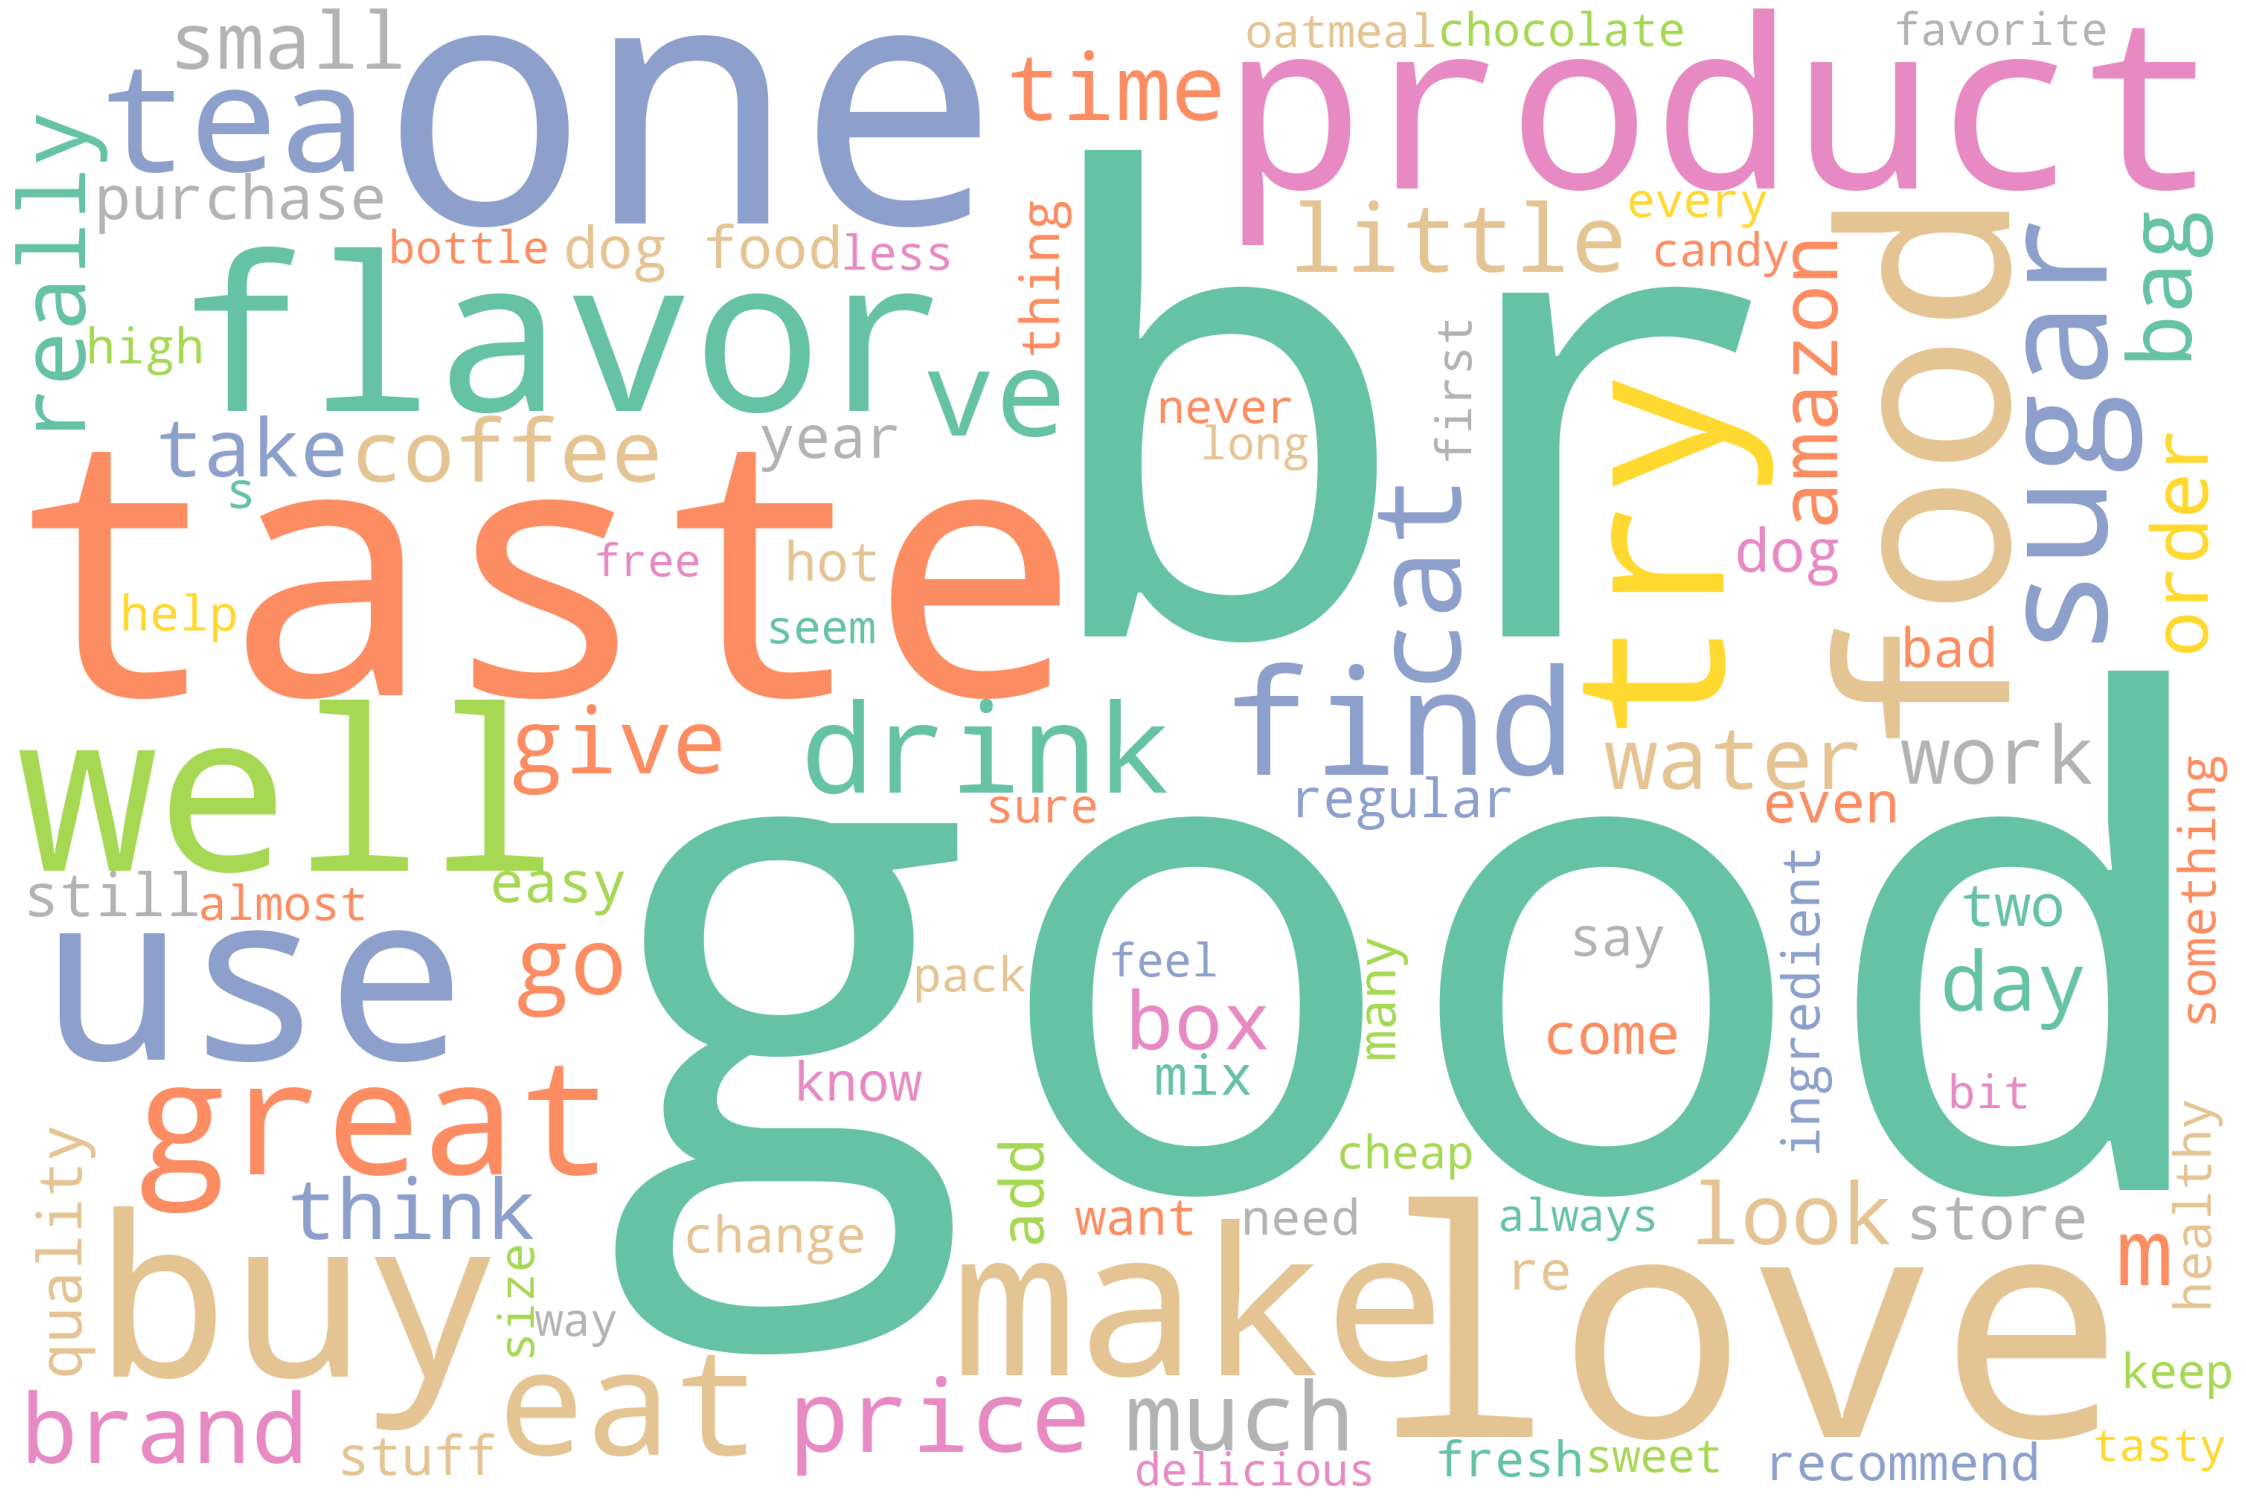

In [49]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')

# Generate word cloud

STOPWORDS.add('Pron')
wordcloud=WordCloud(width=3000,height=2000,background_color='white',max_words=100,
                   colormap='Set2',stopwords=STOPWORDS).generate(clean_reviews)
plot_cloud(wordcloud)


In [50]:
#Named Entity Recognition (NER)

In [51]:
# Parts of speech (POS) tagging
nlp=spacy.load('en_core_web_sm')

one_block=clean_reviews
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [52]:
for token in doc_block[100:200]:
    print(token,token.pos_)

order NOUN
good ADJ
make VERB
cherry NOUN
soda NOUN
flavor PROPN
medicinal PROPN
great ADJ
taffy NOUN
great ADJ
price NOUN
there ADV
wide ADJ
assortment NOUN
yummy ADJ
taffy NOUN
delivery NOUN
quick ADJ
if SCONJ
taffy PROPN
lover PROPN
deal NOUN
get VERB
wild ADJ
hair NOUN
taffy NOUN
order NOUN
five NUM
pound NOUN
bag NOUN
taffy NOUN
enjoyable VERB
many ADJ
flavor NOUN
watermelon NOUN
root NOUN
beer NOUN
melon NOUN
peppermint PROPN
grape NOUN
etc X
my PRON
complaint NOUN
bit NOUN
much ADJ
redblack VERB
licoriceflavore ADJ
piece NOUN
particular PROPN
favorite ADJ
between ADP
kid PROPN
husband NOUN
last ADJ
two NUM
week NOUN
would AUX
recommend VERB
brand NOUN
taffy NOUN
delightful ADJ
treat NOUN
this DET
saltwater NOUN
taffy NOUN
great ADJ
flavor NOUN
soft ADJ
chewy NOUN
each DET
candy NOUN
individually ADV
wrap VERB
well INTJ
none NOUN
candy NOUN
stick NOUN
together ADV
happen VERB
expensive ADJ
version NOUN
fralinger NOUN
would AUX
highly ADV
recommend VERB
candy NOUN
serve VERB
beach

In [53]:
# Filtering the nouns and verbs only
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['recommend', 'candy', 'serve', 'party', 'love', 'taffy', 'chewy', 'flavor', 'recommend', 'buy', 'm', 'sprout', 'cat', 'eat', 'grass', 'love', 'rotate', 'wheatgrass', 'rye', 'dog', 'food', 'digestion', 'puppy', 'dog', 'eat', 'require', 'amount', 'feeding', 'know', 'combination', 'ingredient', 'sauce', 'make', 'kind', 'pick', 'bottle', 'trip', 'bring', 'blow', 'realize', 'find', 'city', 'internet', 'case', 'sauce', 'itbr', 'br', 'love', 'saucei', 'mean', 'love', 'sauce', 'want', 'sauce', 'burn', 'throat', 'grab', 'bottle', 'realize', 'taste', 'want', 'use', 'thank', 'service', 'boy', 'need', 'weight', 'put', 'food', 'floor', 'guy', 'byproduct', 'food', 'boy', 'jump', 'food', 'sit', 'go', 'go', 'food', 'boy', 'lose', 'ounce', 'week', 'cat', 'eat', 'felidae', 'platinum', 'year', 'get', 'bag', 'shape', 'food', 'try', 'food', 'put', 'bowl', 'bowl', 'sit', 'kitty']


In [54]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq,key=lambda x: x[1],reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

,word,count
0,food,122
1,taste,114
2,product,93
3,use,93
4,love,92
5,tea,87
6,buy,83
7,get,79
8,sugar,78
9,make,75


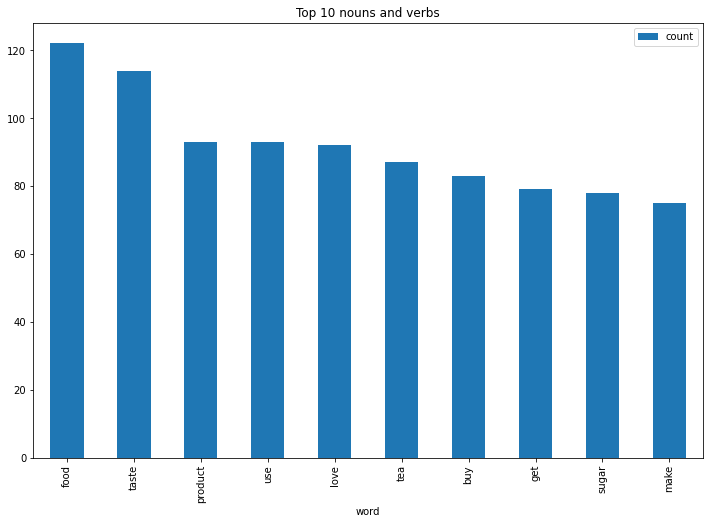

In [55]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs');

In [56]:
from nltk import tokenize
sentences=tokenize.sent_tokenize(' '.join(reviews))
sentences

['I have bought several of the Vitality canned dog food products and have found them all to be of good quality.',
 'The product looks more like a stew than a processed meat and it smells better.',
 'My Labrador is finicky and she appreciates this product better than  most.',
 'Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted.',
 'Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".',
 'This is a confection that has been around a few centuries.',
 'It is a light, pillowy citrus gelatin with nuts - in this case Filberts.',
 'And it is cut into tiny squares and then liberally coated with powdered sugar.',
 'And it is a tiny mouthful of heaven.',
 'Not too chewy, and very flavorful.',
 'I highly recommend this yummy treat.',
 'If you are familiar with the story of C.S.',
 'Lewis\' "The Lion, The Witch, and The Wardrobe" - this is the treat that seduces Edmund into selling out his Brother and Sisters to 

In [57]:
sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df

,sentence
0,I have bought several of the Vitality canned d...
1,The product looks more like a stew than a proc...
2,My Labrador is finicky and she appreciates thi...
3,Product arrived labeled as Jumbo Salted Peanut...
4,Not sure if this was an error or if the vendor...
...,...
1368,"I did and I am quite addicted, it is too easy ..."
1369,The price is really good and well worth the pu...
1370,"If you like this type of Couscous like I do, t..."
1371,I cooked the Couscous with a broth and oilive ...


In [58]:
# Emotion Lexicon - Affin
affin=pd.read_csv('Afinn.csv',sep=',',encoding='Latin-1')
affin

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [59]:
affinity_scores=affin.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [60]:
# Custom function: score each word in a sentence in lemmatised form, but calculate the score for the whole original sentence
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score


In [61]:
# manual testing
calculate_sentiment(text='good service')

3

In [62]:
# Calculating sentiment value for each sentence
sent_df['sentiment_value']=sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value']


0       3
1       2
2       2
3       0
4      -2
       ..
1368    4
1369    5
1370    4
1371    1
1372    0
Name: sentiment_value, Length: 1373, dtype: int64

In [63]:
# how many words are there in a sentence?
sent_df['word_count']=sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0       21
1       15
2       12
3       13
4       18
        ..
1368    25
1369    10
1370    45
1371    21
1372     6
Name: word_count, Length: 1373, dtype: int64

In [64]:
sent_df.sort_values(by='sentiment_value')

,sentence,sentiment_value,word_count
242,"It's not terrible, but it's bad enough that I ...",-9,17
147,In my 1300watt microwave the oatmeal cooks up ...,-6,67
1031,A very delicate green tea with a smooth light ...,-5,37
1307,So if you're feeling tired during the day and ...,-5,23
1336,It has no sugar high & no crash.,-4,8
...,...,...,...
796,These little tins of sugar free mine mints wer...,12,62
793,I eat 2 of these after lunch (because they are...,13,65
1034,The current deal for the pack of 6 is superb (...,13,30
1056,I love love love this deal - it's way fun to p...,13,15


In [65]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    1373.000000
mean        1.408594
std         2.467246
min        -9.000000
25%         0.000000
50%         1.000000
75%         3.000000
max        14.000000
Name: sentiment_value, dtype: float64

In [66]:
# negative sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0]

,sentence,sentiment_value,word_count
3,Product arrived labeled as Jumbo Salted Peanut...,0,13
4,Not sure if this was an error or if the vendor...,-2,18
5,This is a confection that has been around a fe...,0,11
6,"It is a light, pillowy citrus gelatin with nut...",0,14
7,And it is cut into tiny squares and then liber...,-1,14
...,...,...,...
1359,I don't know what to do with the other 11 bott...,0,11
1362,I did use it to make 30+ suckers for my daught...,0,13
1363,But there was going to be no way that the mold...,-1,16
1365,It served it's main purpose :) You HAVE to try...,0,14


In [67]:
# positive sentiment score of the whole review
sent_df[sent_df['sentiment_value']>0]


,sentence,sentiment_value,word_count
0,I have bought several of the Vitality canned d...,3,21
1,The product looks more like a stew than a proc...,2,15
2,My Labrador is finicky and she appreciates thi...,2,12
8,And it is a tiny mouthful of heaven.,2,8
10,I highly recommend this yummy treat.,5,6
...,...,...,...
1367,Try this you might like it.,2,6
1368,"I did and I am quite addicted, it is too easy ...",4,25
1369,The price is really good and well worth the pu...,5,10
1370,"If you like this type of Couscous like I do, t...",4,45


In [68]:
# Adding index cloumn
sent_df['index']=range(0,len(sent_df))
sent_df

,sentence,sentiment_value,word_count,index
0,I have bought several of the Vitality canned d...,3,21,0
1,The product looks more like a stew than a proc...,2,15,1
2,My Labrador is finicky and she appreciates thi...,2,12,2
3,Product arrived labeled as Jumbo Salted Peanut...,0,13,3
4,Not sure if this was an error or if the vendor...,-2,18,4
...,...,...,...,...
1368,"I did and I am quite addicted, it is too easy ...",4,25,1368
1369,The price is really good and well worth the pu...,5,10,1369
1370,"If you like this type of Couscous like I do, t...",4,45,1370
1371,I cooked the Couscous with a broth and oilive ...,1,21,1371


C:\Users\Shirisha\anaconda3\python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

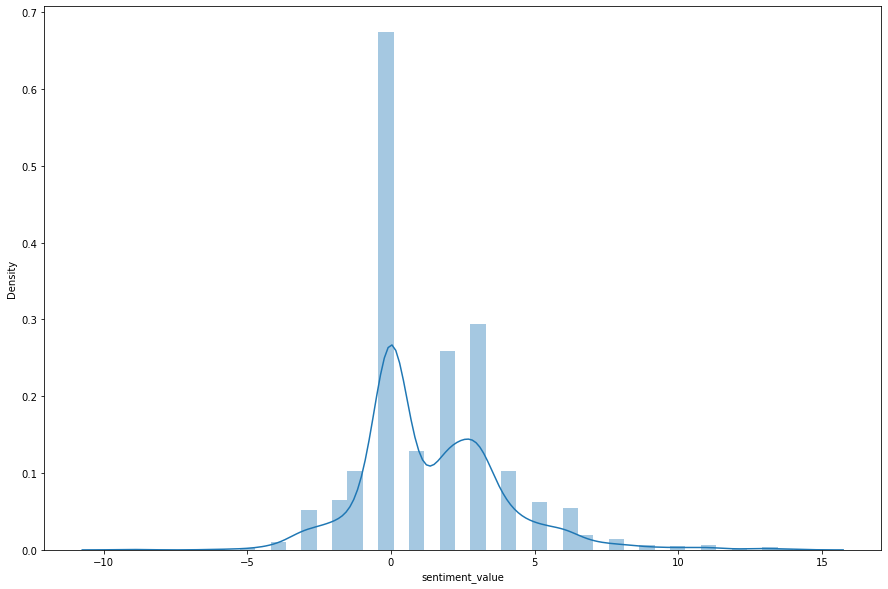

In [69]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(sent_df['sentiment_value'])


<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

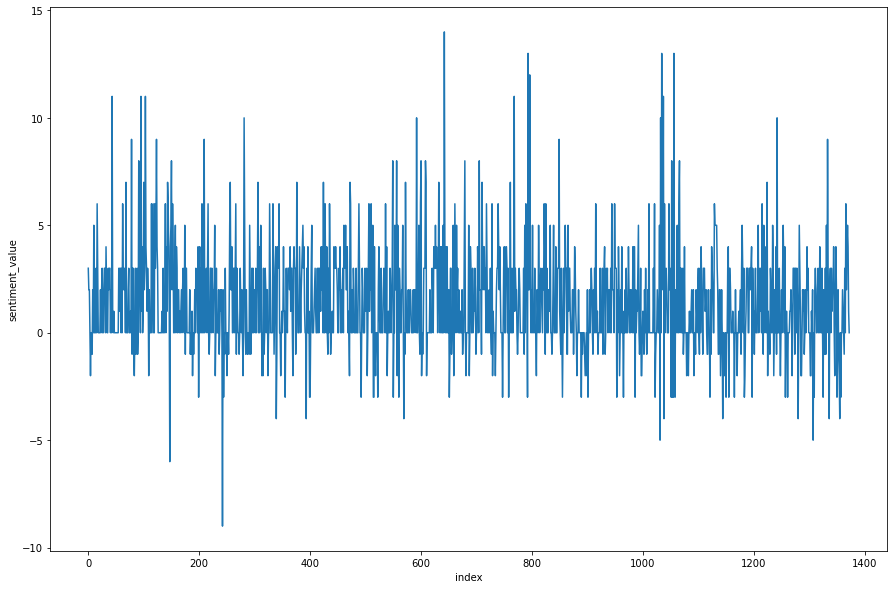

In [70]:
# Plotting the line plot for sentiment value of whole review
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)
